In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

================= Part 1: Find Closest Centroids ====================

To help you implement K-Means, we have divided the learning algorithm 
into two functions -- findClosestCentroids and computeCentroids. In this
part, you should complete the code in the findClosestCentroids function.

In [8]:
print('Finding closest centroids.')
# Load an example dataset that we will be using
data = loadmat('data/ex7data2.mat')
X = data['X']
#Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

Finding closest centroids.


In [11]:
def findClosestCentroids(X, initial_centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single training example.
    """
    m, n = X.shape
    # gather number of centroids
    K = initial_centroids.shape[0]
    idx = np.zeros((m,1))
    temp = np.zeros((K,1))
    
    for i in range(m):
        for j in range(K):
            # calculate displacement
            dist = X[i,:] - initial_centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        # select the smallest length
        idx[i] = np.argmin(temp)+1
    return idx

In [14]:
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


===================== Part 2: Compute Means =========================

After implementing the closest centroids function, you should now
complete the computeCentroids function.

In [21]:
def computeCentroids(X, idx, K):
    """
    Used to move the K centroids to the center of the x^i examples that determine its location
    """
    m, n = X.shape
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    for i in range(m):
        index = int((idx[i]-1)[0])
        # add all data points that map to a centroid
        centroids[index,:]+=X[i,:]
        count[index]+=1
    # then divde by the total number of datapoints making up the centroid to get the average
    return centroids/count

In [22]:
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


=================== Part 3: K-Means Clustering ======================

After you have completed the two functions computeCentroids and
findClosestCentroids, you have all the necessary pieces to run the
kMeans algorithm. In this part, you will run the K-Means algorithm on
the example dataset we have provided. 

In [40]:
def runKMeans(X, initial_centroids, max_iters=10, plot_progress=True):
    K = initial_centroids.shape[0]
    m, n = X.shape
    fig, ax = plt.subplots(nrows=max_iters,ncols=1,figsize=(6,36))
    for i in range(max_iters):
        # Cluster assignment step:
        # Assign each point in X to a centroid
        idx = findClosestCentroids(X, initial_centroids)
        # Move centroid step
        # Compute means based on centroid assignment
        initial_centroids = computeCentroids(X, idx, K)
        
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        # visualize the new centroids
        ax[i].scatter(initial_centroids[:,0],initial_centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
    plt.tight_layout()
    return initial_centroids, idx

location of centroids:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]

 assignment of centroids for first 3 examples X:
[[1.]
 [3.]
 [3.]]


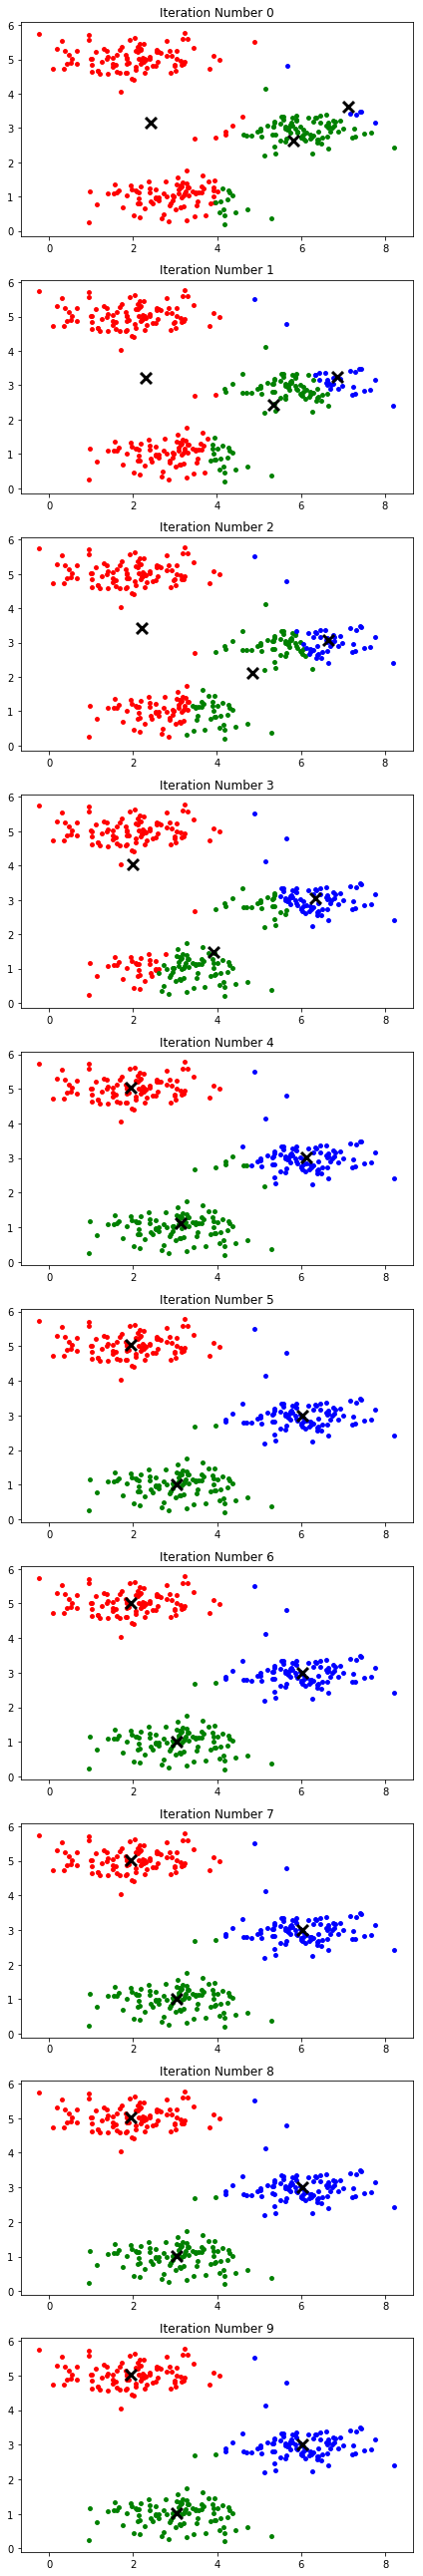

In [41]:
centroids, idx = runKMeans(X, initial_centroids)
print('location of centroids:\n{}'.format(centroids))
print('\n assignment of centroids for first 3 examples X:\n{}'.format(idx[0:3]))

============= Part 4: K-Means Clustering on Pixels ===============

In this exercise, you will use K-Means to compress an image. To do this,
you will first run K-Means on the colors of the pixels in the image and
then you will map each pixel onto its closest centroid.

In [43]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

In [ ]:
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
centroids, idx = runKMeans(X, centroids)